# NLP Basic Ïã§Ïäµ - Text Preprocessing

In [1]:
! pip install konlpy                                            # konlpy installation
! pip install git+https://github.com/haven-jeon/PyKoSpacing.git # PyKoSpacing installation
! pip install hgtk # ÌïúÍ∏Ä ÏûêÎ™® Îã®ÏúÑ Ï≤òÎ¶¨ Ìå®ÌÇ§ÏßÄ ÏÑ§Ïπò

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 19.4/19.4 MB 20.3 MB/s eta 0:00:0000:0100:01
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 587.3/587.3 kB 20.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8.1/8.1 MB 19.4 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
  Cloning https://github.com/haven-jeon/PyKoSpacing.git to /private/var/folders/08/7v7yqd7n0y5cznq8k2_1s6v40000gn/T/pip-req-build-xs5zcuw8
  Running command git clone --filter=blob:none --quiet https://github.com/haven-jeon/PyKoSpacing.git /private/var/folders/08/7v7yqd7n0y5cznq8k2_1s6v40000gn/T/pip-req-build-xs5zcuw8
  Resolved https://github.com/haven-jeon/PyKoSpacing.git to commit b32a889

In [2]:
!git clone https://github.com/facebookresearch/fastText.git
%cd fastText
!make
!pip install .

Cloning into 'fastText'...
remote: Enumerating objects: 3998, done.
remote: Counting objects: 100% (1026/1026), done.
remote: Compressing objects: 100% (195/195), done.
remote: Total 3998 (delta 890), reused 859 (delta 826), pack-reused 2972 (from 1)
Receiving objects: 100% (3998/3998), 8.30 MiB | 16.50 MiB/s, done.
Resolving deltas: 100% (2528/2528), done.
/Users/ganbrygna/Desktop/tobigs/Week4/NLP Basic/·ÑÄ·Öµ·Ü∑·ÑÄ·Ö≥·Ü´·Ñí·Ö°/fastText


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


c++ -pthread -std=c++17 -march=native -O3 -funroll-loops -DNDEBUG -c src/args.cc
c++ -pthread -std=c++17 -march=native -O3 -funroll-loops -DNDEBUG -c src/autotune.cc
In file included from src/autotune.cc:9:
In file included from src/autotune.h:18:
In file included from src/fasttext.h:23:
src/densematrix.h:35:3: warning: explicitly defaulted copy constructor is implicitly deleted [-Wdefaulted-function-deleted]
  DenseMatrix(const DenseMatrix&) = default;
  ^
src/densematrix.h:28:32: note: copy constructor of 'DenseMatrix' is implicitly deleted because field 'data_' has a deleted copy constructor
  intgemm::AlignedVector<real> data_;
                               ^
src/aligned.h:64:5: note: 'AlignedVector' has been explicitly marked deleted here
    AlignedVector(const AlignedVector&) = delete;
    ^
src/densematrix.h:35:37: note: replace 'default' with 'delete'
  DenseMatrix(const DenseMatrix&) = default;
                                    ^~~~~~~
                                    d

In [2]:
import numpy as np
import pandas as pd
from tqdm import tqdm

import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

from pykospacing import Spacing
from konlpy.tag import Okt
import hgtk
from gensim.models import Word2Vec

## 1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú

- ÎÑ§Ïù¥Î≤Ñ ÏáºÌïë Î¶¨Î∑∞ Îç∞Ïù¥ÌÑ∞
- Ìé∏ÏùòÏÉÅ ÏùºÎ∂Ä Ï†ÑÏ≤òÎ¶¨Ìïú Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©
    - raw dataÏóê Í∏ç/Î∂ÄÏ†ï label Ï∂îÍ∞Ä
    - `pykospacing`ÏúºÎ°ú ÎùÑÏñ¥Ïì∞Í∏∞ Ï†ÅÏö© (ÏãúÍ∞Ñ Îã§ÏÜå ÏÜåÏöî)

- raw data Îã§Ïö¥Î°úÎìú : https://github.com/bab2min/corpus/tree/master/sentiment

In [7]:
# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
data = pd.read_csv("naver_shopping.csv")
data.head()

ParserError: Error tokenizing data. C error: Expected 1 fields in line 28, saw 2


## 2. Cleaning


### **Ï†ïÍ∑úÌëúÌòÑÏãù**

- `re.sub(ÎåÄÏ≤¥Ìï† Ìå®ÌÑ¥, ÎåÄÏ≤¥Îêú Í≤∞Í≥º ÌòïÌÉú, ÎåÄÏ≤¥Ìï† Î≤îÏúÑ)`
- `^` : notÏùò ÏùòÎØ∏

In [4]:
# Ï†ïÍ∑úÌëúÌòÑÏãù
def cleaning(text) :

    pattern = r'[^Í∞Ä-Ìû£]'   # ÌïúÍ∏Ä Îã®Ïñ¥ Ï†úÏô∏ Î™®Îëê Í≥µÎ∞±ÏúºÎ°ú ÎåÄÏ≤¥
    text = re.sub(pattern = pattern, repl = ' ', string = text)

    pattern = r'\s+'        # Ïó∞ÏÜç Í≥µÎ∞± Ï†úÍ±∞
    text = re.sub(pattern = pattern, repl = ' ', string = text)
    return text

In [5]:
print(f"Ï†ÑÏ≤òÎ¶¨ Ï†Ñ : {data['reviews'][20]}")

# Ï†ïÍ∑úÌëúÌòÑÏãù Ï†ÅÏö©
data['reviews'] = data['reviews'].apply(cleaning)
print(f"Ï†ÑÏ≤òÎ¶¨ ÌõÑ : {data['reviews'][20]}")

NameError: name 'data' is not defined

## 3. ÎùÑÏñ¥Ïì∞Í∏∞ ÍµêÏ†ï

`pykospacing` ÏùÑ Ïù¥Ïö©ÌïòÏó¨ ÎùÑÏñ¥Ïì∞Í∏∞Í∞Ä ÎêòÏßÄ ÏïäÏùÄ Î¨∏Ïû•ÏùÑ ÎùÑÏñ¥Ïì∞Í∏∞Í∞Ä Îêú Î¨∏Ïû•ÏúºÎ°ú ÍµêÏ†ïÌï¥Ï§çÎãàÎã§. Ïó∞ÏÜç Í≥µÎ∞±ÎèÑ ÌïòÎÇòÏùò Í≥µÎ∞±ÏúºÎ°ú Ï≤òÎ¶¨Ìï¥Ï§çÎãàÎã§.

ÏãúÍ∞Ñ ÏÜåÏöîÍ∞Ä ÌÅ∞ Í¥ÄÍ≥ÑÎ°ú ÏÇ¨Ï†ÑÏóê ÎùÑÏñ¥Ïì∞Í∏∞ Ï†ÅÏö©

In [ ]:
'''
spacing = Spacing()

def spacing_text(text):
    text = spacing(text)
    return text

tqdm.pandas()

data['reviews'] = data['reviews'].progress_apply(spacing_text) # ÏßÑÌñâ ÏÉÅÌô© ÌëúÏãú
'''

## 4. Tokenization



In [ ]:
okt = Okt()

def tokenizing(text) :
    tokenized = okt.morphs(text, stem=True)
    return tokenized

In [ ]:
print(f"ÌÜ†ÌÅ∞Ìôî Í≤∞Í≥º : {tokenizing(data['reviews'][20])}")

ÌÜ†ÌÅ∞Ìôî Í≤∞Í≥º : ['Í∞ÄÏÑ±', 'ÎπÑ', 'Í¥úÏ∞ÆÎã§', 'Î∞îÌÄ¥', 'Í∞Ä', 'Í≥†Ï†ï', 'ÎêòÎã§', 'Î≥Ñ', 'Îã§ÏÑØ', 'Í∞ú', 'ÏßúÎã§', 'Î¶∞', 'Îç∞']


ÏúÑ ÌÜ†ÌÅ∞Ìôî Í≤∞Í≥º ÏòàÏãúÏóêÏÑú Î≥º Ïàò ÏûàÎìØÏù¥, `Í∞ÄÏÑ±ÎπÑ`Î•º `Í∞ÄÏÑ±`, `ÎπÑ`Î°ú ÌÜ†ÌÅ∞ÌôîÌïòÎäî Í≤ΩÏö∞Í∞Ä ÎÇòÌÉÄÎÇ¨ÏäµÎãàÎã§.

Ïù¥Îü¨Ìïú Í≤ΩÏö∞, ÏïÑÎûòÏôÄ Í∞ôÏùÄ Î∞©Î≤ïÏúºÎ°ú **konlpy ÏÇ¨Ï†ÑÏóê Îã®Ïñ¥Î•º Ï∂îÍ∞Ä**Ìï† Ïàò ÏûàÏäµÎãàÎã§.

Colab ÌååÏùºÏóêÏÑú konlpy Ìè¥ÎçîÏóê ÏûÑÏãúÌè¥ÎçîÎ•º ÎßåÎì§Ïñ¥ ÏÉàÎ°úÏö¥ Îã®Ïñ¥Î•º Ï∂îÍ∞ÄÌïú Îí§, ÏõêÎ≥∏ Ìè¥ÎçîÏóê Îã§Ïãú Ï†ÄÏû•Ìï¥Ï§çÎãàÎã§.

<br>

üìçÍ≤ΩÎ°ú Ïò§Î•òÍ∞Ä Î∞úÏÉùÌïú Í≤ΩÏö∞, Ï£ºÎ°ú python Î≤ÑÏ†ÑÏù¥ Îã§Î•∏ Í≤ÉÏù¥ ÏõêÏù∏Ïù¥ÎØÄÎ°ú, Î≥∏Ïù∏ÏóêÍ≤å ÎßûÎäî ÌååÏùº Í≤ΩÎ°úÎ°ú ÏÑ§Ï†ïÌï¥Ï£ºÏÑ∏Ïöî!


In [ ]:
import os

os.chdir('/usr/local/lib/python3.10/dist-packages/konlpy/java') # Í≤ΩÎ°ú Ïù¥Îèô
os.getcwd()
os.makedirs('./aa') # ÏûÑÏãúÌè¥Îçî ÏÉùÏÑ±

In [ ]:
os.chdir('/usr/local/lib/python3.10/dist-packages/konlpy/java/aa') #ÏûÑÏãú Ìè¥ÎçîÎ°ú Ïù¥Îèô
os.getcwd()

'/usr/local/lib/python3.10/dist-packages/konlpy/java/aa'

In [ ]:
# ÏûÑÏãúÌè¥ÎçîÏóê ÏÇ¨Ï†ÑÌååÏùº ÏïïÏ∂ï Ìï¥Ï†ú
! jar xvf ../open-korean-text-2.1.0.jar

  created: META-INF/
 inflated: META-INF/MANIFEST.MF
  created: org/
  created: org/openkoreantext/
  created: org/openkoreantext/processor/
  created: org/openkoreantext/processor/normalizer/
  created: org/openkoreantext/processor/phrase_extractor/
  created: org/openkoreantext/processor/qa/
  created: org/openkoreantext/processor/stemmer/
  created: org/openkoreantext/processor/tokenizer/
  created: org/openkoreantext/processor/tools/
  created: org/openkoreantext/processor/util/
  created: org/openkoreantext/processor/util/adjective/
  created: org/openkoreantext/processor/util/adverb/
  created: org/openkoreantext/processor/util/auxiliary/
  created: org/openkoreantext/processor/util/freq/
  created: org/openkoreantext/processor/util/josa/
  created: org/openkoreantext/processor/util/noun/
  created: org/openkoreantext/processor/util/substantives/
  created: org/openkoreantext/processor/util/typos/
  created: org/openkoreantext/processor/util/verb/
 inflated: org/openkoreantext/pr

In [ ]:
with open(f"/usr/local/lib/python3.10/dist-packages/konlpy/java/aa/org/openkoreantext/processor/util/noun/names.txt") as f:
    words = f.read()

words

'Í∞ÄÎ™Ω\nÍ∞ÄÏò®\nÍ∞ìÏÑ∏Î∏ê\nÍ∞ïÏÉàÏù¥\nÍ≤åÏûÑÎãâÍ∞Ä\nÍ¥ÄÏö∞\nÍ∑ÄÏó¨ÎØ∏\nÍ∑ú\nÍπÄÏú†Ïù¥\nÍπÄÏ§ÄÎ©¥\nÍπåÍπåÎü∞\nÎÖ∏Ïª∑\nÎàÑÎÑàÏòà\nÎãàÎÖ∏\nÎã§ÎßàÍ≥†Ïπò\nÎã§Ïù¥Î¨¥Ïä§\nÎåÄÌïôÏÉù\nÎç∞Ïù¥Î∏å\nÎèÑÏöîÌÜ†ÎØ∏\nÎèôÏö¥\nÎèôÏù¥\nÎëêÏ£ºÎãà\nÎîîÏãúÏù∏ÏÇ¨Ïù¥Îìú\nÎîîÏò§\nÎùºÎ™π\nÎùºÏä§\nÎùºÏòµ\nÎ©çÍµ¨\nÎ©îÏù¥Îì†\nÎ™ÖÎçï\nÎ™ÖÎüâ\nÎ¨∏ÎØºÏ†ïÎ∂Ä\nÎØ∏ÎÑ§\nÎ∞©ÏóòÎ¶¨\nÎ≥ëÌóå\nÎ∂ìÎã§\nÎπÑÏ†ïÏÉÅÌöåÎã¥\nÎπºÎπºÎ°ú\nÏÇºÌíç\nÏÉ§Ïù∏Ïò®ÎØ∏\nÏÑ±Ïãù\nÏÑ±Ïó¥\nÏÑ∏ÎùºÎ¨∏\nÏÑ∏ÎùºÎ≥µ\nÏÑ∏Ï¢ÖÎåÄÏôï\nÏÜêÍ∂å\nÏÜêÏ±Ö\nÏáºÎØ∏ÎçîÎ®∏Îãà\nÏáºÏ±î\nÏàúÍ∑ú\nÏä§ÎùºÏÜåÎãà\nÏã†ÎèôÏïÑ\nÏã†Ïì∞Ìå®Î∞ÄÎ¶¨\nÏã†ÏïÑÎùº\nÏïÑÎ≤†\nÏïàÏÉÅÌôç\nÏïàÌôçÏ§Ä\nÏó¨ÎàÑ\nÏó¨Îûë\nÏó¨Ìè¨\nÏó∞Ìï©\nÏò§Íæ∏Îã≠\nÏöîÏÑ≠\nÏõÉÏ∞æÏÇ¨\nÏõêÏãù\nÏú†Î≥ëÏñ∏\nÏú†ÎπÑ\nÏú†Ïù¥\nÏú§Í∏∞Ìòï\nÏù¥ÎÇòÎã®\nÏù¥Î™ÖÎ∞ï\nÏù¥ÏôÑÏö©\nÏûÑÏ∞ΩÏö©\nÏûêÍ¥¥\nÏûêÎãàÏú§\nÏûêÎåÄÎ†®\nÏûêÏú†\nÏû¨Ï§ëÏù¥\nÏ†ÑÍµêÏ°∞\nÏ†ïÏú§Ìöå\nÏ†úÍ∞àÎüâ\nÏ°∞ÏûêÎ£°\nÏ°∞Ï°∞\nÏ§ÄÎ©¥\nÏßÄÏò§Îîî\nÏßÄÏ°¥Ìåå\nÏßÑÏòÅÏò§\nÏ∞®ÏûëÍ∞Ä\nÏ∞®Ìä∏\nÏ∞ΩÏÑ≠\nÏ±†Ìä∏\nÏ≤∏\nÏΩîÎ•¥ÏÇ¨Ï£º\nÌïòÎ¨¥Ïó¥\nÌïòÏö©ÌååÏø†\nÌòÅÏû¨\nÌòÑÏù¥\nÌòÑÌÉú\nÌòúÎØ

In [ ]:
# Îã®Ïñ¥ Ï∂îÍ∞Ä
words += 'Í∞ÄÏÑ±ÎπÑ\nÎ∂àÎ©ç\nÏÉùÍ∞ÅÎ≥¥Îã§\n'

with open("/usr/local/lib/python3.10/dist-packages/konlpy/java/aa/org/openkoreantext/processor/util/noun/names.txt", 'w') as f:
    f.write(words)

In [ ]:
# Îã§Ïãú ÏïïÏ∂ï
!jar cvf ../open-korean-text-2.1.0.jar *

added manifest
ignoring entry META-INF/
ignoring entry META-INF/MANIFEST.MF
adding: META-INF/maven/(in = 0) (out= 0)(stored 0%)
adding: META-INF/maven/org.openkoreantext/(in = 0) (out= 0)(stored 0%)
adding: META-INF/maven/org.openkoreantext/open-korean-text/(in = 0) (out= 0)(stored 0%)
adding: META-INF/maven/org.openkoreantext/open-korean-text/pom.properties(in = 119) (out= 110)(deflated 7%)
adding: META-INF/maven/org.openkoreantext/open-korean-text/pom.xml(in = 9127) (out= 2208)(deflated 75%)
adding: org/(in = 0) (out= 0)(stored 0%)
adding: org/openkoreantext/(in = 0) (out= 0)(stored 0%)
adding: org/openkoreantext/processor/(in = 0) (out= 0)(stored 0%)
adding: org/openkoreantext/processor/normalizer/(in = 0) (out= 0)(stored 0%)
adding: org/openkoreantext/processor/normalizer/KoreanNormalizer.class(in = 2980) (out= 2181)(deflated 26%)
adding: org/openkoreantext/processor/normalizer/KoreanNormalizer$Segment$.class(in = 2577) (out= 989)(deflated 61%)
adding: org/openkoreantext/processor/

üìç Îü∞ÌÉÄÏûÑÏùÑ Ïû¨ÏãúÏûëÌïú ÌõÑ ÏïÑÎûò ÏÖÄÏùÑ Ïã§ÌñâÌï¥Ïïº Ï†úÎåÄÎ°ú Î∞òÏòÅÏù¥ Îê©ÎãàÎã§!!

In [ ]:
data['tokenized_reviews'] = data['reviews'].apply(tokenizing)

print(data['tokenized_reviews'][20])

['Í∞ÄÏÑ±ÎπÑ', 'Í¥úÏ∞ÆÎã§', 'Î∞îÌÄ¥', 'Í∞Ä', 'Í≥†Ï†ï', 'ÎêòÎã§', 'Î≥Ñ', 'Îã§ÏÑØ', 'Í∞ú', 'ÏßúÎã§', 'Î¶∞', 'Îç∞']


### cf. Î°úÏª¨ÏóêÏÑú ÏßÑÌñâÌïòÎäî Í≤ΩÏö∞




java ÏÑ§Ïπò ÌïÑÏàò

``` python
# konlpy ÏÑ§Ïπò Í≤ΩÎ°ú
import konlpy
konlpy.data.path

import os

os.chdir('C:\\Users\\User\\anaconda3\\envs\\python39\\Lib\\site-packages\\konlpy\\java')
os.getcwd()
os.makedirs('.\\aaaa')

os.chdir('C:/Users/User/anaconda3/envs/python39/Lib/site-packages/konlpy/java/aaaa') #ÏûÑÏãú Ìè¥ÎçîÎ°ú Ïù¥Îèô
os.getcwd()

# ÏûÑÏãúÌè¥ÎçîÏóê ÏÇ¨Ï†ÑÌååÏùº ÏïïÏ∂ï Ìï¥Ï†ú
# jar Î™ÖÎ†πÏñ¥Î°ú Ïã§ÌñâÏù¥ ÎêòÏßÄ ÏïäÎäîÎã§Î©¥, jar.exe Í≤ΩÎ°úÎ°ú ÏÑ§Ï†ïÌï¥Ï£ºÏÑ∏Ïöî
! "C:\\Program Files\\Java\\jdk-11.0.15.1\\bin\\jar.exe" xvf ../open-korean-text-2.1.0.jar
```

## 5. Stopwords

- Î∂àÏö©Ïñ¥ : Î∂ÑÏÑùÏóê ÌïÑÏöîÌïòÏßÄ ÏïäÍ±∞ÎÇò Î∂ÑÏÑù Í≤∞Í≥ºÏóê ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî Îã®Ïñ¥
- ÏïÑÎûò Î∂àÏö©Ïñ¥ ÏûêÎ£åÏóê Î™á Í∞úÏùò Îã®Ïñ¥ Ï∂îÍ∞ÄÌïòÏó¨ ÏóÖÎ°úÎìúÌïòÏòÄÏäµÎãàÎã§.
- `Counter`Î°ú ÌÜ†ÌÅ∞ Îì±Ïû• ÎπàÎèÑ ÌôïÏù∏ Î∞è Î∂àÏö©Ïñ¥/ÏòàÏô∏ Îã®Ïñ¥ Ï∂îÍ∞Ä Îì± ÌôúÏö© Í∞ÄÎä•
- Î∂àÏö©Ïñ¥ Ï∞∏Í≥† ÏÇ¨Ïù¥Ìä∏: https://www.ranks.nl/stopwords/korean

In [ ]:
# Î∂àÏö©Ïñ¥ Î¶¨Ïä§Ìä∏ ÎßåÎì§Í∏∞
path = '/content/stopwords.txt'

with open(path) as f:
    stopwords = f.readlines()

stopwords_list = []
for stopword in stopwords:
  stopwords = re.sub('[\n]', '', stopword)
  stopwords_list.append(stopwords)

In [ ]:
# Î∂àÏö©Ïñ¥ Ï†úÍ±∞
data['processed_reviews'] = data['tokenized_reviews'].apply(lambda tokens: ' '.join([token for token in tokens if token not in stopwords_list]))
data.head()

ratings                                            reviews  label  \
0        5                                           Î∞∞Í≥µ Îπ†Î•¥Í≥† Íµø      1   
1        2                 ÌÉùÎ∞∞Í∞Ä ÏóâÎßùÏù¥ ÎÑ§Ïö© Ï†ÄÌù¨ Ïßë Î∞ëÏóê Ï∏µÏóê ÎßêÎèÑ ÏóÜÏù¥ ÎÜîÎëêÍ≥† Í∞ÄÍ≥†      0   
2        5  ÏïÑÏ£º Ï¢ãÏïÑÏöî Î∞îÏßÄ Ï†ïÎßê Ï¢ãÏïÑÏÑú Í∞ú Îçî Íµ¨Îß§ÌñàÏñ¥Ïöî Ïù¥ Í∞ÄÍ≤©Ïóê ÎåÄÎ∞ïÏûÖÎãàÎã§ Î∞îÎäêÏßàÏù¥ Ï°∞Í∏à...      1   
3        2  ÏÑ†Î¨ºÏö©ÏúºÎ°ú Îπ®Î¶¨ Î∞õÏïÑÏÑú Ï†ÑÎã¨ÌñàÏñ¥Ïïº ÌïòÎäî ÏÉÅÌíàÏù¥ÏóàÎäîÎç∞ Î®∏Í∑∏ÏªµÎßå ÏôÄÏÑú ÎãπÌô©ÌñàÏäµÎãàÎã§ Ï†ÑÌôî...      0   
4        5                    ÎØºÌä∏ ÏÉâÏÉÅ ÏòàÎªêÏöî ÏòÜ ÏÜêÏû°Ïù¥Îäî Í±∞Îäî Ïö©ÎèÑÎ°úÎèÑ ÏÇ¨Ïö©ÎêòÎÑ§Ïöî       1   

                                   tokenized_reviews  \
0                                       [Î∞∞Í≥µ, Îπ†Î•¥Îã§, Íµø]   
1  [ÌÉùÎ∞∞, Í∞Ä, ÏóâÎßù, Ïù¥, ÎÑ§, Ïö©, Ï†ÄÌù¨, Ïßë, Î∞ë, Ïóê, Ï∏µ, Ïóê, Îßê, ÎèÑ, ...   
2  [ÏïÑÏ£º, Ï¢ãÎã§, Î∞îÏßÄ, Ï†ïÎßê, Ï¢ãÎã§, Í∞ú, Îçî, Íµ¨Îß§, ÌïòÎã§, Ïù¥, Í∞ÄÍ≤©, Ïóê, ÎåÄ...   
3  [ÏÑ†Î¨º, Ïö©, ÏúºÎ°ú, Îπ®Î¶¨, Î∞õÎã§, Ï†ÑÎã¨, ÌïòÎã§, ÌïòÎã§, ÏÉÅÌíà, Ïù¥Îã§, Î®∏Í∑∏Ïªµ, Îßå...   
4   [ÎØºÌä∏, ÏÉâÏÉÅ, ÏòàÏÅòÎã§, ÏòÜ, ÏÜêÏû°Ïù¥, Îäî, Í±∞, Îäî, Ïö©, ÎèÑÎ°ú, ÎèÑ, ÏÇ¨Ïö©, ÎêòÎã§]   

                                   processed_reviews  
0                                           Î∞∞Í≥µ Îπ†Î•¥Îã§ Íµø  
1                            ÌÉùÎ∞∞ ÏóâÎßù Ïßë Î∞ë Ï∏µ Îßê ÏóÜÏù¥ ÎÜîÎëêÎã§ Í∞ÄÎã§  
2    ÏïÑÏ£º Ï¢ãÎã§ Î∞îÏßÄ Ï†ïÎßê Ï¢ãÎã§ Íµ¨Îß§ Í∞ÄÍ≤© ÎåÄÎ∞ï Î∞îÎäêÏßà Ïóâ ÏÑ±ÌïòÎã§ Ìé∏ÌïòÎã§ Í∞ÄÏÑ±ÎπÑ ÏµúÍ≥† ÏòàÏöî  
3  ÏÑ†Î¨º Îπ®Î¶¨ Î∞õÎã§ Ï†ÑÎã¨ ÏÉÅÌíà Î®∏Í∑∏Ïªµ Ïò§Îã§ ÎãπÌô© Ï†ÑÌôîÌïòÎã§ Ï£ºÏã† Î∞∞ÏÜ° ÎàÑÎùΩ ÌôïÏù∏ ÏÑ†Î¨º ÌÅ∞...  
4                              ÎØºÌä∏ ÏÉâÏÉÅ ÏòàÏÅòÎã§ ÏòÜ ÏÜêÏû°Ïù¥ ÎèÑÎ°ú ÏÇ¨Ïö©

## 6. Vectorization


### 6.1 Word2Vec

- Skip-gram : Ï§ëÏã¨ Îã®Ïñ¥Îì§Î°ú Î∂ÄÌÑ∞ Ï£ºÎ≥Ä Îã®Ïñ¥Î•º ÏòàÏ∏°
- CBOW  : Ï£ºÎ≥Ä Îã®Ïñ¥Îì§Î°ú Î∂ÄÌÑ∞ Ï§ëÏã¨ Îã®Ïñ¥Î•º ÏòàÏ∏°


>  Word2Vec Îß§Í∞úÎ≥ÄÏàò ÏÑ§Î™Ö
- `vector_size` : ÏûÑÎ≤†Îî© Î≤°ÌÑ∞ Ï∞®Ïõê
- `window` : context window ÌÅ¨Í∏∞ (Ï§ëÏã¨ Îã®Ïñ¥ Í∑ºÏ≤òÏóêÏÑú Î≥º Îã®Ïñ¥ Í∞úÏàò)
- `min_count` : Îã®Ïñ¥ ÏµúÏÜå ÎπàÎèÑ Ïàò (ÏµúÏÜå nÎ≤à Îì±Ïû•Ìïú Îã®Ïñ¥)
- `workers` : ÌïôÏäµÏùÑ ÏúÑÌïú ÌîÑÎ°úÏÑ∏Ïä§ Ïàò
- `sg= 0`ÏùÄ CBOW, `sg= 1`ÏùÄ Skip-gram.

In [ ]:
sentences = [review.split() for review in data['processed_reviews']]

cbow = Word2Vec(sentences= sentences , vector_size = 100 , window = 5, min_count=5 , workers = 4 , sg = 0)
skip_gram = Word2Vec(sentences= sentences , vector_size = 100 , window = 5, min_count=5 , workers = 4 , sg = 1)

### 6.2 FastText

 - subword ÏÇ¨Ïö© ‚Üí Out Of Vocabulary(OOV) Î¨∏Ï†úÎ•º Ìï¥Í≤∞
 - Word2vec ÏóêÏÑú Îã®Ïñ¥Îäî Îçî Ïù¥ÏÉÅ Ï™ºÍ∞§Ïßà Ïàò ÏóÜÎäî ÏµúÏÜå Îã®ÏúÑÎùºÎ©¥, FastTextÏóêÏÑúÎäî ÌïòÎÇòÏùò Îã®Ïñ¥ÏóêÏÑúÎèÑ SubwordsÎ°ú Î∂ÑÎ¶¨ÌïòÏó¨ Î≤°ÌÑ∞Î•º ÏÉùÏÑ±Ìï† Ïàò ÏûàÏùå

- ÌïúÍµ≠Ïñ¥Îäî ÏùåÏ†à Îã®ÏúÑÏôÄ ÏûêÎ™® Îã®ÏúÑÎ°ú ÎÇòÎâ† Ïàò ÏûàÏùå
- ÏûêÎ™® Îã®ÏúÑÎ°ú ÏûÑÎ≤†Îî©ÌïòÎ©¥ Ïò§ÌÉÄÎÇò ÎÖ∏Ïù¥Ï¶à Ï∏°Î©¥ÏóêÏÑú Îçî Í∞ïÌïú ÏûÑÎ≤†Îî©ÏùÑ Í∏∞ÎåÄÌï† Ïàò ÏûàÏùå


ÏïÑÎûò ÏΩîÎìú Ï∞∏Í≥† ÏÇ¨Ïù¥Ìä∏ : https://museonghwang.github.io/nlp(natural%20language%20processing)/2023/02/10/nlp-kor-fasttext/

1. Îã®Ïñ¥Î•º ÏûêÎ™® Îã®ÏúÑÎ°ú Î∂ÑÎ¶¨ÌïòÍ∏∞

In [ ]:
# Ï¥àÏÑ±, Ï§ëÏÑ±, Ï¢ÖÏÑ±ÏúºÎ°ú ÎÇòÎàÑÎäî Ìï®Ïàò
def word_to_jamo(token):
  def to_special_token(jamo): # Í≤ΩÏö∞Ïóê Îî∞Îùº Ï¥à, Ï§ë, Ï¢ÖÏÑ±Ïù¥ Îã§ ÏûàÎäî Í≤å ÏïÑÎãå Í≤ΩÏö∞ÎèÑ ÏûàÎã§. Ïù¥ Í≤ΩÏö∞ -Î•º Î∞òÌôòÌï¥Ï£ºÎäî Ìï®Ïàò
    if not jamo:
      return '-'
    else:
      return jamo

  decomposed_token = ''
  for char in token:
    try:
      # char(ÏùåÏ†à)ÏùÑ Ï¥àÏÑ±, Ï§ëÏÑ±, Ï¢ÖÏÑ±ÏúºÎ°ú Î∂ÑÎ¶¨
      cho, jung, jong = hgtk.letter.decompose(char)

      # ÏûêÎ™®Í∞Ä Îπà Î¨∏ÏûêÏùº Í≤ΩÏö∞ ÌäπÏàòÎ¨∏Ïûê -Î°ú ÎåÄÏ≤¥
      cho = to_special_token(cho)
      jung = to_special_token(jung)
      jong = to_special_token(jong)
      decomposed_token = decomposed_token + cho + jung + jong

    # ÎßåÏïΩ char(ÏùåÏ†à)Ïù¥ ÌïúÍ∏ÄÏù¥ ÏïÑÎãê Í≤ΩÏö∞ ÏûêÎ™®Î•º ÎÇòÎàÑÏßÄ ÏïäÍ≥† Ï∂îÍ∞Ä
    except Exception as exception:
      if type(exception).__name__ == 'NotHangulException':
        decomposed_token += char

  # Îã®Ïñ¥ ÌÜ†ÌÅ∞Ïùò ÏûêÎ™® Îã®ÏúÑ Î∂ÑÎ¶¨ Í≤∞Í≥ºÎ•º Ï∂îÍ∞Ä
  return decomposed_token

In [ ]:
#ÏûêÎ™® Îã®ÏúÑÎ°ú Î≥ÄÌôòÎêú Î¶¨Ïä§Ìä∏Î•º Î∞òÌôòÌïòÎäî Ìï®Ïàò
def decompose_sentences_to_jamo(sentences):
    decomposed_sentences = []
    for sentence in sentences:
        decomposed_sentence = [word_to_jamo(word) for word in sentence.split()]
        decomposed_sentences.append(decomposed_sentence)
    return decomposed_sentences

jamo_sentences = decompose_sentences_to_jamo(data['processed_reviews'])

In [ ]:
jamo_sentences[0]

['„ÖÇ„Öê-„Ñ±„Öó„Öá', '„ÖÉ„Öè-„Ñπ„Ö°-„Ñ∑„Öè-', '„Ñ±„Öú„ÖÖ']

2. ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Î•º txtÌååÏùºÎ°ú Ï†ÄÏû•ÌïòÍ∏∞

In [ ]:
with open('/content/tokenized_data.txt', 'w') as out:
    for line in tqdm(jamo_sentences, unit=' line'):
        out.write(' '.join(line) + '\n')

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 200000/200000 [00:00<00:00, 471878.52 line/s]


3. FastText ÌïôÏäµÌïòÍ∏∞

- `train_unsupeviesd` : ÌõàÎ†®ÏãúÏºúÏ£ºÎäî Ìï®Ïàò
- `model` : cbowÎÇò skipgram Ï§ëÏóê ÌïòÎÇò ÏÑ†ÌÉù

In [ ]:
import fasttext
model = fasttext.train_unsupervised('/content/tokenized_data.txt', model='cbow')
model.save_model("/content/fasttext.bin") # Î™®Îç∏ Ï†ÄÏû•
model = fasttext.load_model("/content/fasttext.bin") # Î™®Îç∏ Î°úÎìú

4. ÏûêÎ™® Îã®ÏúÑÎ°ú Î∂ÑÌï¥Îêú Í≤∞Í≥ºÎ¨º Îã§Ïãú Í≤∞Ìï©ÏãúÏºúÏ£ºÎäî Ìï®Ïàò ÎßåÎì§Í∏∞

    Ï∂úÎ†•ÏúºÎ°ú ÎÇòÏò§Îäî Î≤°ÌÑ∞Îì§ÎèÑ ÏûêÎ™® Îã®ÏúÑÎ°ú Î∂ÑÌï¥Ìï¥ÏÑú ÎÇòÏò§Í∏∞ ÎåÄÎ¨∏Ïóê Ïó≠ÏúºÎ°ú Îã®Ïñ¥ ÌòïÌÉúÎ°ú Í≤∞Ìï©ÌïòÍ≥† ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑ Í≤∞Í≥ºÎ•º Îçî Ìé∏Î¶¨ÌïòÍ≤å Î≥º Ïàò ÏûàÏùå

In [ ]:
def jamo_to_word(jamo_sequence):
    tokenized_jamo = []
    index = 0

    # 1. Ï¥àÍ∏∞ ÏûÖÎ†•
    # jamo_sequence = '„Ñ¥„Öè„ÖÅ„Ñ∑„Öó„Öá„ÖÖ„Öê„Öá'

    while index < len(jamo_sequence):
        # Î¨∏ÏûêÍ∞Ä ÌïúÍ∏Ä(Ï†ïÏÉÅÏ†ÅÏù∏ ÏûêÎ™®)Ïù¥ ÏïÑÎãê Í≤ΩÏö∞
        if not hgtk.checker.is_hangul(jamo_sequence[index]):
            tokenized_jamo.append(jamo_sequence[index])
            index = index + 1

        # Î¨∏ÏûêÍ∞Ä Ï†ïÏÉÅÏ†ÅÏù∏ ÏûêÎ™®ÎùºÎ©¥ Ï¥àÏÑ±, Ï§ëÏÑ±, Ï¢ÖÏÑ±ÏùÑ ÌïòÎÇòÏùò ÌÜ†ÌÅ∞ÏúºÎ°ú Í∞ÑÏ£º.
        else:
            tokenized_jamo.append(jamo_sequence[index:index + 3])
            index = index + 3

    # 2. ÏûêÎ™® Îã®ÏúÑ ÌÜ†ÌÅ∞Ìôî ÏôÑÎ£å
    # tokenized_jamo : ['„Ñ¥„Öè„ÖÅ', '„Ñ∑„Öó„Öá', '„ÖÖ„Öê„Öá']

    word = ''
    try:
        for jamo in tokenized_jamo:

            # Ï¥àÏÑ±, Ï§ëÏÑ±, Ï¢ÖÏÑ±Ïùò Î¨∂ÏùåÏúºÎ°ú Ï∂îÏ†ïÎêòÎäî Í≤ΩÏö∞
            if len(jamo) == 3:
                if jamo[2] == "-":
                    # Ï¢ÖÏÑ±Ïù¥ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÎäî Í≤ΩÏö∞
                    word = word + hgtk.letter.compose(jamo[0], jamo[1])
                else:
                    # Ï¢ÖÏÑ±Ïù¥ Ï°¥Ïû¨ÌïòÎäî Í≤ΩÏö∞
                    word = word + hgtk.letter.compose(jamo[0], jamo[1], jamo[2])
            # ÌïúÍ∏ÄÏù¥ ÏïÑÎãå Í≤ΩÏö∞
            else:
                word = word + jamo

    # Î≥µÏõê Ï§ë(hgtk.letter.compose) ÏóêÎü¨ Î∞úÏÉù Ïãú Ï¥àÍ∏∞ ÏûÖÎ†• Î¶¨ÌÑ¥.
    # Î≥µÏõêÏù¥ Î∂àÍ∞ÄÎä•Ìïú Í≤ΩÏö∞ ÏòàÏãú) '„Ñ¥!„ÖÅ„Ñ∑„Öó„Öá„ÖÖ„Öê„Öá'
    except Exception as exception:
        if type(exception).__name__ == 'NotHangulException':
            return jamo_sequence

    # 3. Îã®Ïñ¥Î°ú Î≥µÏõê ÏôÑÎ£å
    return word

In [ ]:
def transform_to_word(word_sequence):
    return [(jamo_to_word(word), similarity) for (similarity, word) in word_sequence]

In [ ]:
# ÏòàÏãú
result = model.get_nearest_neighbors(word_to_jamo('Ï†úÌíà'), k=5)

print('Í∏∞Ï°¥ Ï∂úÎ†• Í≤∞Í≥º :', result)
print('Îã®Ïñ¥ ÌòïÌÉúÎ°ú Í≤∞Ìï©Ìïú Í≤∞Í≥º :',transform_to_word(result))

Í∏∞Ï°¥ Ï∂úÎ†• Í≤∞Í≥º : [(0.9164107441902161, '„Öà„Öê-„Öç„Öú„ÖÅ'), (0.8550317287445068, '„Öç„Öè-„Öç„Öú„ÖÅ'), (0.8468971848487854, '„ÖÅ„Öï„Öá„Öç„Öú„ÖÅ'), (0.8237121105194092, '„ÖÖ„Öè„Öá„Öç„Öú„ÖÅ'), (0.8208646774291992, '„Öé„Öè-„Öç„Öú„ÖÅ')]
Îã®Ïñ¥ ÌòïÌÉúÎ°ú Í≤∞Ìï©Ìïú Í≤∞Í≥º : [('Ïû¨Ìíà', 0.9164107441902161), ('ÌååÌíà', 0.8550317287445068), ('Î™ÖÌíà', 0.8468971848487854), ('ÏÉÅÌíà', 0.8237121105194092), ('ÌïòÌíà', 0.8208646774291992)]


### 6.3 Word2Vec vs. FastText

In [ ]:
# ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑÎ•º Í∏∞Î∞òÏúºÎ°ú ÏûÖÎ†•Ìïú Îã®Ïñ¥ÏôÄ Í∞ÄÏû• Ïú†ÏÇ¨Ìïú Îã®Ïñ¥Î•º Ï∂úÎ†•
print("CBOW Ïú†ÏÇ¨ÎèÑ :", cbow.wv.most_similar("Î∞∞ÏÜ°", topn=10))
print("Skip-gram Ïú†ÏÇ¨ÎèÑ :", skip_gram.wv.most_similar("Î∞∞ÏÜ°", topn=10))
print('FastText Ïú†ÏÇ¨ÎèÑ :',transform_to_word(model.get_nearest_neighbors(word_to_jamo('Î∞∞ÏÜ°'), k=10)))

CBOW Ïú†ÏÇ¨ÎèÑ : [('Î∞úÏÜ°', 0.7006781697273254), ('Î∞∞Îã¨', 0.6870409250259399), ('ÏàòÎ†π', 0.62492835521698), ('ÏÜçÎèÑ', 0.6155195832252502), ('Ï∂úÍ≥†', 0.6148164868354797), ('Ï∂îÏÑù', 0.6078894734382629), ('ÎåÄÏ≤ò', 0.6018383502960205), ('Ïó∞Ìú¥', 0.6004464030265808), ('ÌÜµÍ¥Ä', 0.5873206257820129), ('Í∏àÏöîÏùº', 0.586451530456543)]
Skip-gram Ïú†ÏÇ¨ÎèÑ : [('ÏÜ°ÎèÑ', 0.7596209645271301), ('Î∞∞ÏÜå', 0.732318103313446), ('Î≤†ÏÜ°', 0.7254812121391296), ('Ïö∞Ï≤¥Íµ≠', 0.7145565748214722), ('Ïã†ÏÜç', 0.702326774597168), ('ÌäπÍ∏â', 0.6922234296798706), ('ÏôìÍµ¨', 0.6865512728691101), ('ÏÖßÏñ¥', 0.6860278248786926), ('ÎùºÏò§', 0.6851147413253784), ('ÏÑ∏Í¥Ä', 0.6791128516197205)]
FastText Ïú†ÏÇ¨ÎèÑ : [('Î∞∞ÏÜî', 0.8402809500694275), ('Î∞∞ÏÜê', 0.8336290121078491), ('Î≤†ÏÜ°', 0.8093811273574829), ('Î∞∞ÏÜ°ÏßÄ', 0.7813335657119751), ('Ï£ÑÏÜ°', 0.7539911866188049), ('Î∞∞Îã¨', 0.7301645874977112), ('ÏÜ°', 0.7079083323478699), ('ÌïúÏßÑÌÉùÎ∞∞', 0.7056535482406616), ('Î∞∞ÏÜå', 0.7038280963897705), ('

In [ ]:
print("CBOW Ïú†ÏÇ¨ÎèÑ :", cbow.wv.most_similar("Ï†úÌíà", topn=10))
print("Skip-gram Ïú†ÏÇ¨ÎèÑ :", skip_gram.wv.most_similar("Ï†úÌíà", topn=10))
print('FastText Ïú†ÏÇ¨ÎèÑ :',transform_to_word(model.get_nearest_neighbors(word_to_jamo('Ï†úÌíà'), k=10)))

CBOW Ïú†ÏÇ¨ÎèÑ : [('ÏÉÅÌíà', 0.7457141876220703), ('Î¨ºÍ±¥', 0.5719906687736511), ('Ïû¨Ìíà', 0.5713706612586975), ('Î¨ºÌíà', 0.5031464099884033), ('Ï§ëÍ≥†', 0.501223087310791), ('ÌíàÏßà', 0.4831600785255432), ('ÏÉùÏÇ∞', 0.47261932492256165), ('ÏÇ¨Ïù¥Ìä∏', 0.4694647192955017), ('Í≤ÄÏÇ¨', 0.466547429561615), ('Î∂àÎßå', 0.4654137194156647)]
Skip-gram Ïú†ÏÇ¨ÎèÑ : [('ÏÉÅÌíà', 0.8335520625114441), ('Ïû¨Ìíà', 0.803382158279419), ('Í±∞Ïó¨', 0.6826555728912354), ('ÏÉÅÌîî', 0.6645216941833496), ('Î¨ºÍ±¥', 0.6605415940284729), ('ÏÜåÎ™®Ìíà', 0.6556629538536072), ('Î©¥ÏÑ∏Ï†ê', 0.6545745730400085), ('ÎåÄÌñâ', 0.6481685638427734), ('Ï†úÌîî', 0.6427112221717834), ('ÌÄÑÎü¨Ìã∞', 0.6411038637161255)]
FastText Ïú†ÏÇ¨ÎèÑ : [('Ïû¨Ìíà', 0.9164107441902161), ('ÌååÌíà', 0.8550317287445068), ('Î™ÖÌíà', 0.8468971848487854), ('ÏÉÅÌíà', 0.8237121105194092), ('ÌïòÌíà', 0.8208646774291992), ('Ï†ïÏÉÅÌíà', 0.8174718022346497), ('Ïû¨Í≥†Ìíà', 0.8039121031761169), ('ÎπÑÌíà', 0.8012660145759583), ('Î≥ºÌíà', 0.792745113372

## ÏòàÏãú 1. WordCloudÎ°ú ÌïµÏã¨ ÌÇ§ÏõåÎìú ÏãúÍ∞ÅÌôî

In [ ]:
positive_reviews = data[data['label'] == 1]['processed_reviews']
negative_reviews = data[data['label'] == 0]['processed_reviews']

# ÌïòÎÇòÏùò Î¨∏ÏûêÏó¥Î°ú Í≤∞Ìï©
positive_text = ' '.join(positive_reviews)
negative_text = ' '.join(negative_reviews)

In [ ]:
%matplotlib inline
def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=400):
    wordcloud = WordCloud(font_path = '/content/malgun.ttf',
                          background_color = backgroundcolor,
                          width = width,
                          height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

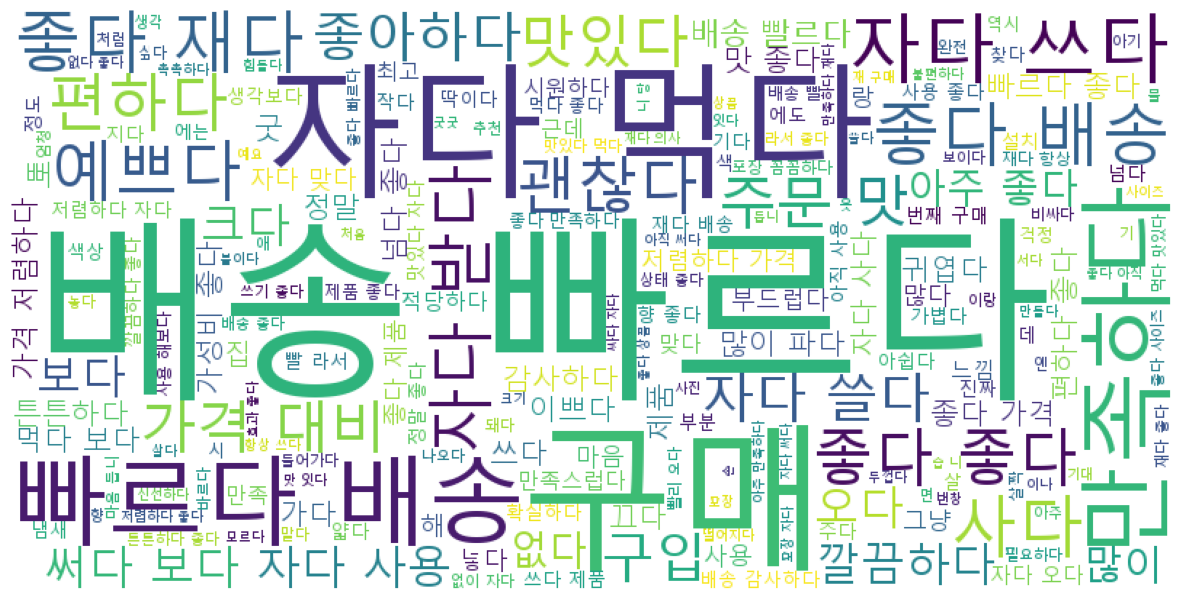

In [ ]:
# ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÏÉùÏÑ±
displayWordCloud(positive_text)

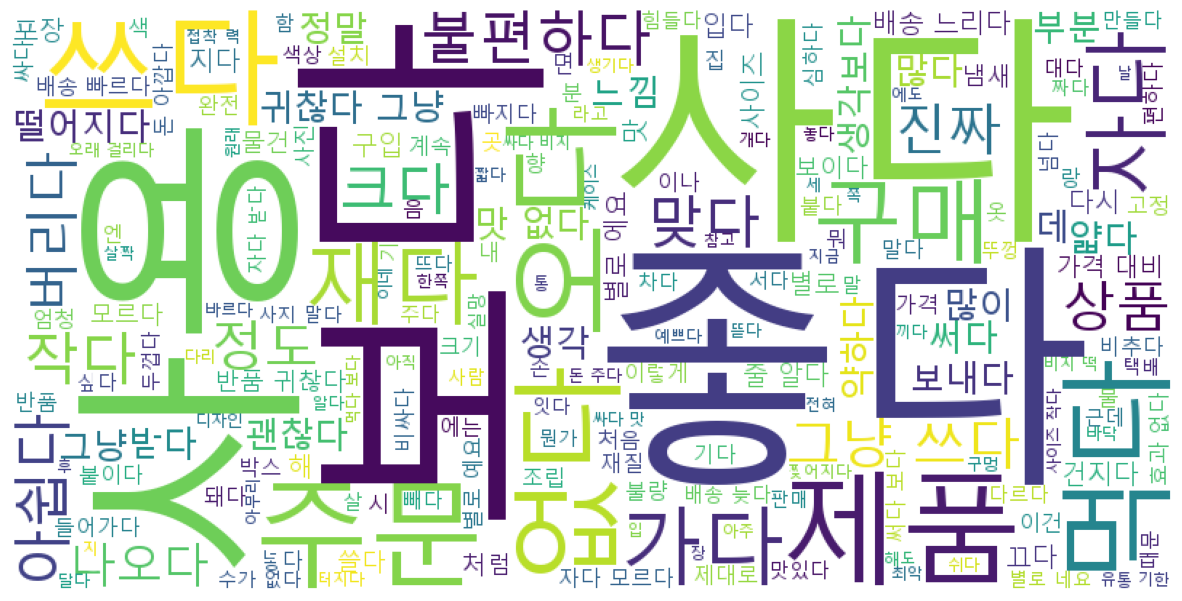

In [ ]:
displayWordCloud(negative_text)

## ÏòàÏãú 2. LSTMÏùÑ Ïù¥Ïö©Ìïú ÏáºÌïë Î¶¨Î∑∞ Îç∞Ïù¥ÌÑ∞ Ïù¥ÏßÑ Î∂ÑÎ•ò (w. Word2vec)

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data['processed_reviews'], data['label'], test_size=0.2, stratify= data['label'])

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_encoded = tokenizer.texts_to_sequences(X_train)
X_test_encoded = tokenizer.texts_to_sequences(X_test)

In [ ]:
# Ìå®Îî©
max_len = max(len(seq) for seq in X_train_encoded)
X_train_padded = pad_sequences(X_train_encoded, maxlen=max_len, padding='post')
X_test_padded = pad_sequences(X_test_encoded, maxlen=max_len, padding='post')

EMBEDDING MATRIX ÏÉùÏÑ±

In [ ]:
# Word2Vec
embedding_dim = cbow.wv.vector_size
vocab_size = len(tokenizer.word_index) + 1
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in tokenizer.word_index.items():
    if word in cbow.wv:
        embedding_matrix[i] = cbow.wv[word]
    else:
        embedding_matrix[i] = np.zeros(embedding_dim)   # ÏóÜÎäî Îã®Ïñ¥Îäî 0ÏúºÎ°ú

MODELING

In [ ]:
model = Sequential()

model.add(Embedding(input_dim=len(tokenizer.word_index) + 1,
                    output_dim=embedding_dim,
                    weights=[embedding_matrix],  # Word2Vec ÏûÑÎ≤†Îî© Îß§Ìä∏Î¶≠Ïä§ ÏÇ¨Ïö©
                    input_length=max_len,
                    trainable=False))

model.add(LSTM(128, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
history = model.fit(X_train_padded, y_train, epochs=5, batch_size=64, validation_split=0.2, callbacks=[early_stop])

Epoch 1/5
2000/2000 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 225s 111ms/step - accuracy: 0.8543 - loss: 0.3578 - val_accuracy: 0.8783 - val_loss: 0.3106
Epoch 2/5
2000/2000 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 254s 107ms/step - accuracy: 0.8829 - loss: 0.3009 - val_accuracy: 0.8811 - val_loss: 0.2955
Epoch 3/5
2000/2000 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 254s 103ms/step - accuracy: 0.8911 - loss: 0.2807 - val_accuracy: 0.8752 - val_loss: 0.2948
Epoch 4/5
2000/2000 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 269s 106ms/step - accuracy: 0.8952 - loss: 0.2672 - val_accuracy: 0.8805 - val_loss: 0.2927
Epoch 5/5
2000/2000 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 216s 108ms/step - accuracy: 0.8993 - loss: 0.2552 - val_accuracy: 0.8835 - val_loss: 0.2859


In [ ]:
print("Ï†ïÌôïÎèÑ %.4f" % (model.evaluate(X_test_padded, y_test)[1]))

1250/1250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 37s 29ms/step - accuracy: 0.8854 - loss: 0.2810
Ï†ïÌôïÎèÑ 0.8864
